In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_provider = pd.read_csv("Medicare_Provider_Charge_Inpatient_FY2016.csv")
df = pd.read_csv("Resources/2016_statedata.csv")

#print(df["Provider State"].nunique())
      
#df.count()
df.columns
#df['DRG Definition'].nunique()
#df['DRG Definition'].unique()
df.head()


C:\Users\vasud\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DRG Definition,Provider State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,AL,14,"$962,498.36","$284,914.79","$148,511.00"
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,CO,17,"$1,153,214.53","$263,056.94","$204,396.41"
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,IA,17,"$758,456.82","$205,891.47","$201,847.06"
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,MD,20,"$335,844.25","$309,431.50","$306,840.80"
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,OR,20,"$510,127.25","$252,960.50","$241,896.90"


In [2]:

df_renamed = df.rename(columns={'DRG Definition':'Diagnosis',
                               'Provider State':'State',
                               ' Total Discharges ':'Total Discharges'})
#by_state = df_renamed.groupby(['State','Diagnosis'])


#average_dollars = by_state[['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']].mean()
# average_dollars

#by_state.count().head(20)

#list of selected diagnosis
diag_list = ['293 - HEART FAILURE & SHOCK W/O CC/MCC','292 - HEART FAILURE & SHOCK W CC','194 - SIMPLE PNEUMONIA & PLEURISY W CC','684 - RENAL FAILURE W/O CC/MCC','699 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W CC']
#diag_list = ['203 - BRONCHITIS & ASTHMA W/O CC/MCC']
#diag_list = ['699 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W CC']
#diag_list
df_renamed.columns
#df_renamed_value.head()
#type(df_renamed_value.iloc[0,9])

Index(['Diagnosis', 'State', 'Total Discharges', 'Average Covered Charges',
       'Average Total Payments', 'Average Medicare Payments'],
      dtype='object')

In [3]:
#total_discharges = by_state[" Total Discharges "].sum()
#total_discharges
#df_renamed_value = df_renamed.loc[df_renamed.Diagnosis.isin(['293 - HEART FAILURE & SHOCK W/O CC/MCC','292 - HEART FAILURE & SHOCK W CC','194 - SIMPLE PNEUMONIA & PLEURISY W CC','684 - RENAL FAILURE W/O CC/MCC','699 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W CC'])]
df_renamed_value = df_renamed[df_renamed.Diagnosis.isin(diag_list)]
df_renamed_value

# '293 - HEART FAILURE & SHOCK W/O CC/MCC',
# '292 - HEART FAILURE & SHOCK W CC',
# '194 - SIMPLE PNEUMONIA & PLEURISY W CC',
# '684 - RENAL FAILURE W/O CC/MCC',
# '699 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W CC'

#Convert Average Provider Charges field to float
if (type(df_renamed_value.iloc[0,2]) == str):
    df_renamed_value['Average Covered Charges'] = df_renamed_value['Average Covered Charges'].str.replace('$','').str.replace(',','')
    df_renamed_value['Average Covered Charges'] = df_renamed_value['Average Covered Charges'].astype(np.float64)
    df_renamed_value['Total Discharges'] = df_renamed_value['Total Discharges'].str.replace(',','')
    df_renamed_value['Total Discharges'] = df_renamed_value['Total Discharges'].astype(np.int64)


# df_renamed_value_grp = df_renamed_value.groupby(['State'])

# df_renamed_value_grp_sum = df_renamed_value_grp['Average Covered Charges'].sum()
# df_renamed_value_grp_sumdf = pd.DataFrame(df_renamed_value_grp_sum)

# df_renamed_value_grp_sumdf.sort_values('Average Covered Charges',ascending=False).head()

#df_renamed_value
#type(df_renamed_value['Average Covered Charges'][0])
#df_renamed_value
#type(df_renamed_value['Average Covered Charges'][0])
#df_renamed_value['Average Covered Charges'].dtype

df_renamed_value.head()

C:\Users\vasud\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\vasud\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\vasud\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,Diagnosis,State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
5477,194 - SIMPLE PNEUMONIA & PLEURISY W CC,AK,189,31616.39,"$12,111.08","$10,943.80"
5478,194 - SIMPLE PNEUMONIA & PLEURISY W CC,WY,220,18254.50,"$9,150.60","$7,950.86"
5479,194 - SIMPLE PNEUMONIA & PLEURISY W CC,HI,222,25489.82,"$9,963.84","$7,892.34"
5480,194 - SIMPLE PNEUMONIA & PLEURISY W CC,VT,245,13798.22,"$8,282.57","$7,120.70"
5481,194 - SIMPLE PNEUMONIA & PLEURISY W CC,MT,273,16105.85,"$6,660.18","$5,472.50"


In [4]:
#Finding values for 5 states for 5 diagnosis
df_by_states = df_renamed_value.loc[(df_renamed_value['State']=='CA') |(df_renamed_value['State']=='FL') |(df_renamed_value['State']=='TX')|(df_renamed_value['State']=='VT')|(df_renamed_value['State']=='ND')]
df_by_states.head()

,Diagnosis,State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
5480,194 - SIMPLE PNEUMONIA & PLEURISY W CC,VT,245,13798.22,"$8,282.57","$7,120.70"
5483,194 - SIMPLE PNEUMONIA & PLEURISY W CC,ND,306,14679.98,"$6,823.13","$5,454.83"
5525,194 - SIMPLE PNEUMONIA & PLEURISY W CC,CA,8534,53418.45,"$9,179.61","$7,704.66"
5526,194 - SIMPLE PNEUMONIA & PLEURISY W CC,TX,9288,35061.84,"$6,831.16","$5,223.51"
5527,194 - SIMPLE PNEUMONIA & PLEURISY W CC,FL,9833,39439.82,"$6,427.78","$5,094.97"


#Finding top 5 and bottom 5 states based on Average Covered Charges
df_all_renamed = df_renamed

#df_state_groupdf = pd.DataFrame(df_state_group)
if (type(df_all_renamed['Average Covered Charges'][0]) == str):
    df_all_renamed['Average Covered Charges'] = df_all_renamed['Average Covered Charges'].str.replace('$','').str.replace(',','')
    df_all_renamed['Average Covered Charges'] = df_all_renamed['Average Covered Charges'].astype(np.float64)
    df_all_renamed['Total Discharges'] = df_all_renamed['Total Discharges'].str.replace(',','')
    df_all_renamed['Total Discharges'] = df_all_renamed['Total Discharges'].astype(np.float64)

df_state_group = df_all_renamed.groupby(['State'])
#df_renamed_value_grp_sum = df_state_group['Average Covered Charges'].sum()
df_renamed_value_grp_sum = (df_state_group['Average Covered Charges'].sum())/(df_state_group['Total Discharges'].sum())

df_state_group_sumdf = pd.DataFrame({'ACC_Sum':df_state_group['Average Covered Charges'].sum(),
                                     'TD_Sum':df_state_group['Total Discharges'].sum(),
                                     })
#df_state_group_sumdf.sort_values('Average Covered Charges',ascending=False).head()

# df_all_renamed.columns
#type(df_all_renamed['Average Covered Charges'][0])
#df_state_group_sumdf.head()
#df_all_renamed_convertdtype
df_state_group_sumdf

In [5]:
#Amount Charged by each state for a diagnosis
df_by_states['Per Diagnosis'] = ((df_by_states['Average Covered Charges'])/(df_by_states['Total Discharges']))
df_by_states.head()

C:\Users\vasud\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Diagnosis,State,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Per Diagnosis
5480,194 - SIMPLE PNEUMONIA & PLEURISY W CC,VT,245,13798.22,"$8,282.57","$7,120.70",56.319265
5483,194 - SIMPLE PNEUMONIA & PLEURISY W CC,ND,306,14679.98,"$6,823.13","$5,454.83",47.973791
5525,194 - SIMPLE PNEUMONIA & PLEURISY W CC,CA,8534,53418.45,"$9,179.61","$7,704.66",6.259486
5526,194 - SIMPLE PNEUMONIA & PLEURISY W CC,TX,9288,35061.84,"$6,831.16","$5,223.51",3.774961
5527,194 - SIMPLE PNEUMONIA & PLEURISY W CC,FL,9833,39439.82,"$6,427.78","$5,094.97",4.010965


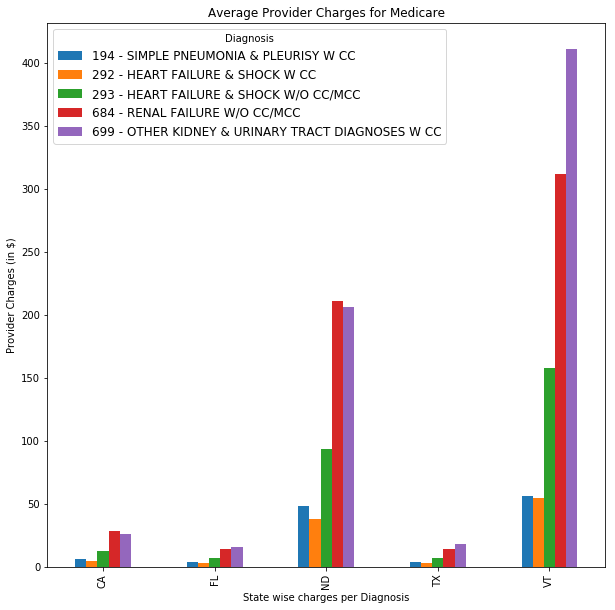

In [70]:
#Plotting graph
df_by_states.pivot("State", "Diagnosis", "Per Diagnosis").plot(kind='bar', figsize=(10,10))

# Give our chart some labels and a tile
plt.title("Average Provider Charges for Medicare")
plt.xlabel("State wise charges per Diagnosis")
plt.ylabel("Provider Charges (in $)")

# Create a legend for our chart
plt.legend(loc="best",title='Diagnosis',fontsize=12)

plt.show()

In [60]:
#Different provider charges for a state for a diagnosis
df_provider.columns

#Renaming the columns for easy access
df_pr_renamed = df_provider.rename(columns={'Provider State':'State',
                                            'Provider Name':'PName',
                                            'Provider Id':'PId',
                                             'DRG Definition':'Diagnosis'})


# providers_by_state = provider_by_state.loc[(provider_by_state['Provider State']=='TX')]
# providers_by_state
#df_provider.columns
#provider_by_state

# '293 - HEART FAILURE & SHOCK W/O CC/MCC',
# '292 - HEART FAILURE & SHOCK W CC',
# '194 - SIMPLE PNEUMONIA & PLEURISY W CC',
# '684 - RENAL FAILURE W/O CC/MCC',
# '699 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W CC'

#Providers for above 5 diagnosis for all states
df_renamed_provider = df_pr_renamed[df_pr_renamed.Diagnosis.isin(diag_list)]
df_renamed_provider

#Providers for TX state for the above list of diagnosis (658 rows)
state_list = ['TX']
df_renamed_provider_state = df_renamed_provider[df_renamed_provider.State.isin(state_list)]
df_renamed_provider_state

#Grouping based on providers 
#This will yield providers and the number of diagnosis they provide from the list of 5 diagnosis
df_renamed_provider_state_grp = df_renamed_provider_state.groupby(['PId','PName'])
df_renamed_provider_state_grp.count().head(100)

#Replacing NaN values in the column Total Discharges
df_provider_total_discharge = pd.DataFrame(df_renamed_provider_state)

#Convert Average Provider Charges field to float
if (type(df_provider_total_discharge.iloc[0,9]) == str):
    df_provider_total_discharge['Average Covered Charges'] = df_provider_total_discharge['Average Covered Charges'].str.replace('$','').str.replace(',','')
    df_provider_total_discharge['Average Covered Charges'] = df_provider_total_discharge['Average Covered Charges'].astype(np.float64)
        
    df_provider_total_discharge["Total Discharges"] = df_provider_total_discharge["Total Discharges"].str.replace("," , "")
    df_provider_total_discharge["Total Discharges"] = pd.to_numeric(df_provider_total_discharge["Total Discharges"])
    
#Finding the mean of the total discharges and replacing the NaN values with mean
mean_val = df_provider_total_discharge['Total Discharges'].mean()
df_provider_total_discharge['Total Discharges'] = df_provider_total_discharge['Total Discharges'].replace(np.nan,mean_val)

#Making a list of all providers who provide all selected 5 diagnosis (in Texas State)
df_renamed_provider_state_grp_cnt = df_renamed_provider_state_grp.count()

df_renamed_provider_state_grp_cnt_top = df_renamed_provider_state_grp_cnt.loc[df_renamed_provider_state_grp_cnt['Diagnosis']>4]
df_renamed_provider_state_grp_cnt_top

df_provider_total_discharge

,Diagnosis,PId,PName,Provider Street Address,Provider City,State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
42368,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450002,PROVIDENCE MEMORIAL HOSPITAL,2001 N OREGON ST,EL PASO,TX,79902,TX - El Paso,39.9,54990.60,"$7,053.87","$6,010.38"
42369,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450007,PETERSON REGIONAL MEDICAL CENTER,551 HILL COUNTRY DRIVE,KERRVILLE,TX,78028,TX - San Antonio,39.9,28160.32,"$5,784.94","$4,815.77"
42370,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450010,UNITED REGIONAL HEALTH CARE SYSTEM,1600 11TH STREET,WICHITA FALLS,TX,76301,TX - Wichita Falls,39.9,24379.39,"$7,308.63","$5,605.93"
42371,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450011,ST JOSEPH REGIONAL HEALTH CENTER,2801 FRANCISCAN DR,BRYAN,TX,77802,TX - Bryan,39.9,25309.72,"$6,200.05","$4,881.05"
42372,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450015,PARKLAND HEALTH AND HOSPITAL SYSTEM,5200 HARRY HINES BLVD,DALLAS,TX,75235,TX - Dallas,39.9,41055.53,"$17,541.91","$12,993.41"
42373,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450018,UNIVERSITY OF TEXAS MEDICAL BRANCH,301 UNIVERSITY BOULEVARD,GALVESTON,TX,77555,TX - Houston,39.9,36120.28,"$12,885.15","$9,018.77"
42374,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450021,BAYLOR UNIVERSITY MEDICAL CENTER,3500 GASTON AVE,DALLAS,TX,75246,TX - Dallas,39.9,25955.84,"$8,348.74","$5,339.21"
42375,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450023,CITIZENS MEDICAL CENTER,2701 HOSPITAL DRIVE,VICTORIA,TX,77901,TX - Victoria,39.9,33309.39,"$5,574.31","$4,482.13"
42376,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450024,UNIVERSITY MEDICAL CENTER OF EL PASO,4815 ALAMEDA AVE,EL PASO,TX,79905,TX - El Paso,39.9,21769.53,"$10,389.88","$8,162.41"
42377,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450028,VALLEY BAPTIST MEDICAL CENTER- BROWNSVILLE,1040 W JEFFERSON ST,BROWNSVILLE,TX,78520,TX - Harlingen,39.9,56579.43,"$7,113.71","$6,127.21"


In [64]:
#Finding values for 7 providers for 5 diagnosis
df_by_providers = df_provider_total_discharge[df_provider_total_discharge['PName'].isin(["BAPTIST BEAUMONT HOSPITAL","BAYLOR UNIVERSITY MEDICAL CENTER","HOUSTON METHODIST HOSPITAL","KINGWOOD MEDICAL CENTER","SETON MEDICAL CENTER AUSTIN","ST DAVID'S MEDICAL CENTER","TEXOMA MEDICAL CENTER"])]
df_by_providers

,Diagnosis,PId,PName,Provider Street Address,Provider City,State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
42374,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450021,BAYLOR UNIVERSITY MEDICAL CENTER,3500 GASTON AVE,DALLAS,TX,75246,TX - Dallas,39.9,25955.84,"$8,348.74","$5,339.21"
42391,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450056,SETON MEDICAL CENTER AUSTIN,1201 W 38TH ST,AUSTIN,TX,78705,TX - Austin,39.9,39862.80,"$6,402.22","$4,586.98"
42453,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450324,TEXOMA MEDICAL CENTER,5016 S US HIGHWAY 75,DENISON,TX,75020,TX - Dallas,39.9,37044.95,"$6,291.77","$4,750.28"
42456,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450346,BAPTIST BEAUMONT HOSPITAL,3080 COLLEGE STREET,BEAUMONT,TX,77701,TX - Beaumont,39.9,28069.80,"$6,164.18","$4,866.38"
42461,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450358,HOUSTON METHODIST HOSPITAL,6565 FANNIN,HOUSTON,TX,77030,TX - Houston,39.9,42130.02,"$8,374.77","$5,806.57"
42473,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450431,ST DAVID'S MEDICAL CENTER,919 E 32ND ST,AUSTIN,TX,78705,TX - Austin,39.9,31660.88,"$6,841.02","$5,333.26"
42536,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450775,KINGWOOD MEDICAL CENTER,22999 US HWY 59,KINGWOOD,TX,77325,TX - Houston,39.9,67844.67,"$7,054.06","$5,179.82"
75959,292 - HEART FAILURE & SHOCK W CC,450021,BAYLOR UNIVERSITY MEDICAL CENTER,3500 GASTON AVE,DALLAS,TX,75246,TX - Dallas,212.0,26051.13,"$8,420.19","$5,880.13"
75976,292 - HEART FAILURE & SHOCK W CC,450056,SETON MEDICAL CENTER AUSTIN,1201 W 38TH ST,AUSTIN,TX,78705,TX - Austin,108.0,55064.97,"$7,798.61","$5,077.62"
76033,292 - HEART FAILURE & SHOCK W CC,450324,TEXOMA MEDICAL CENTER,5016 S US HIGHWAY 75,DENISON,TX,75020,TX - Dallas,140.0,30200.15,"$6,026.44","$5,236.56"


In [65]:
#Amount Charged by each provider for a diagnosis
df_by_providers['Per Diagnosis'] = ((df_by_providers['Average Covered Charges'])/(df_by_providers['Total Discharges']))
df_by_providers.head()

C:\Users\vasud\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Diagnosis,PId,PName,Provider Street Address,Provider City,State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Per Diagnosis
42374,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450021,BAYLOR UNIVERSITY MEDICAL CENTER,3500 GASTON AVE,DALLAS,TX,75246,TX - Dallas,39.9,25955.84,"$8,348.74","$5,339.21",650.522306
42391,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450056,SETON MEDICAL CENTER AUSTIN,1201 W 38TH ST,AUSTIN,TX,78705,TX - Austin,39.9,39862.80,"$6,402.22","$4,586.98",999.067669
42453,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450324,TEXOMA MEDICAL CENTER,5016 S US HIGHWAY 75,DENISON,TX,75020,TX - Dallas,39.9,37044.95,"$6,291.77","$4,750.28",928.444862
42456,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450346,BAPTIST BEAUMONT HOSPITAL,3080 COLLEGE STREET,BEAUMONT,TX,77701,TX - Beaumont,39.9,28069.80,"$6,164.18","$4,866.38",703.503759
42461,194 - SIMPLE PNEUMONIA & PLEURISY W CC,450358,HOUSTON METHODIST HOSPITAL,6565 FANNIN,HOUSTON,TX,77030,TX - Houston,39.9,42130.02,"$8,374.77","$5,806.57",1055.890226


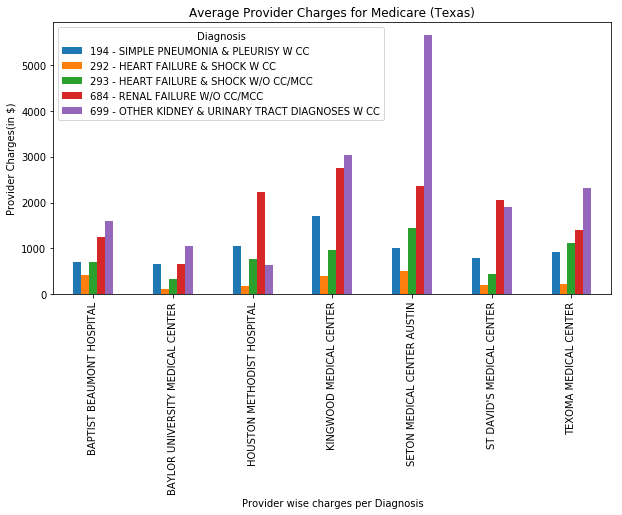

In [74]:
#Plotting graph
df_by_providers.pivot("PName", "Diagnosis", "Per Diagnosis").plot(kind='bar', figsize=(10,5))

# Give our chart some labels and a tile
plt.title("Average Provider Charges for Medicare (Texas)")
plt.xlabel("Provider wise charges per Diagnosis")
plt.ylabel("Provider Charges(in $)")

# Create a legend for our chart
plt.legend(loc="best",title='Diagnosis')

plt.show()

In [9]:
#Top Medical providers in Texas

In [10]:
for state in all_states:
    if df["Provider State"] == state:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-10-828ced09adca>, line 3)